In [1]:

import numpy as np       
import datetime as dt
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import sys
import datetime as dt
sys.path.append('/Users/heather/ICECAPS-ACE/DataParse/')

from utils import *
from fluxtower_parse import *

In [2]:

def get_hmp(start,stop,d_loc,hmp_name):
    f_date_list = pd.date_range(start.date(),stop.date(),freq='1D')
    out = pd.DataFrame(columns=['Date','RH','Ta','Tw','Err','h'])
    for date in f_date_list:
        f = d_loc + r'%s_%s'%(hmp_name,str(date.date()))
        try:
            data = pd.read_csv(f,parse_dates=[0],index_col=[0])
        except:
            print('No data for %s'%str(date.date()))
            continue

        out = out.append(data,sort=True)    
    
    # Get rid of any duplicates
    out = out[~out.index.duplicated()]   
    # Crop to datetime
    out=out[start:stop]
    
    # Resample to one minutely
    out = out.resample(rule = '1min', how='mean')
    
    # Fill any missing minutes with nans
    new_index = pd.date_range(out.index[0],out.index[-1] , freq='min')
    out = out.reindex(new_index)
    
    return out

In [5]:
# Get data
dpath= '/Volumes/Data/ICECAPSarchive/fluxtower/processed/HMP/'

# Start and stop date:
d1 = dt.datetime(2019,6,20,7,0)
d2 = dt.datetime(2019,8,3,7,0)

hmp1 = get_hmp(d1,d2,dpath,'HMP1')
#hmp2 = get_hmp(d1,d2,dpath,'HMP2')
#hmp3 = get_hmp(d1,d2,dpath,'HMP3')
#hmp4 = get_hmp(d1,d2,dpath,'HMP4')


#KT_qcd = KT.copy()
#KT_qcd['T'][KT['QC']!=1]=np.nan


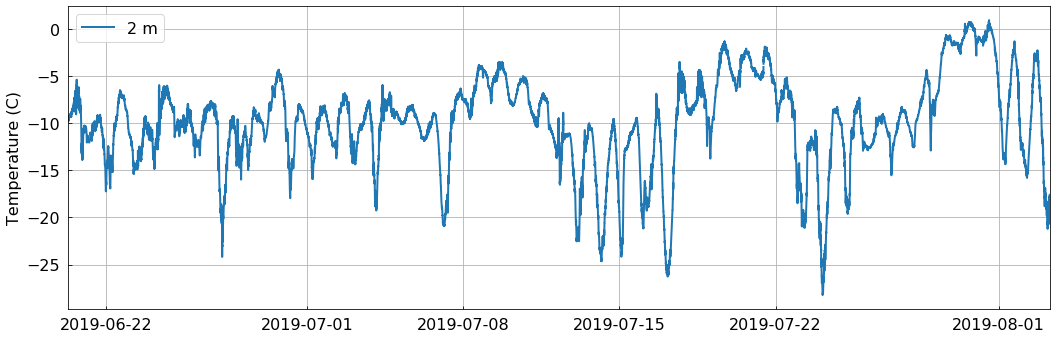

In [6]:
from matplotlib import rcParams
# Plotting preferences:
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams.update({'font.size': 16}) 
rcParams['axes.titlepad'] = 16 
rcParams['xtick.major.pad']='8'
rcParams['ytick.major.pad']='8'


fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.grid(True)
ax.plot(hmp1.index,hmp1['Ta'], label='2 m',lw=2)   
#ax.plot(hmp2.index,hmp2['Ta'], label='4 m',lw=2)   
#ax.plot(hmp3.index,hmp3['Ta'], label='9 m',lw=2)   
#ax.plot(hmp4.index,hmp4['Ta'], label='14 m',lw=2)   

ax.set_ylabel('Temperature (C)')

#ax.xaxis.set_major_formatter(md.DateFormatter('%H'))
#ax.xaxis.set_major_locator(md.DayLocator(bymonthday=1))
#ax.xaxis.set_major_locator(md.HourLocator(interval=3))
ax.legend()
ax.set_xlim(d1,d2)
#ax.legend(loc='best',fontsize=10)
fig.tight_layout()
#fig.savefig(d_loc + 'Ncounts_current.png')


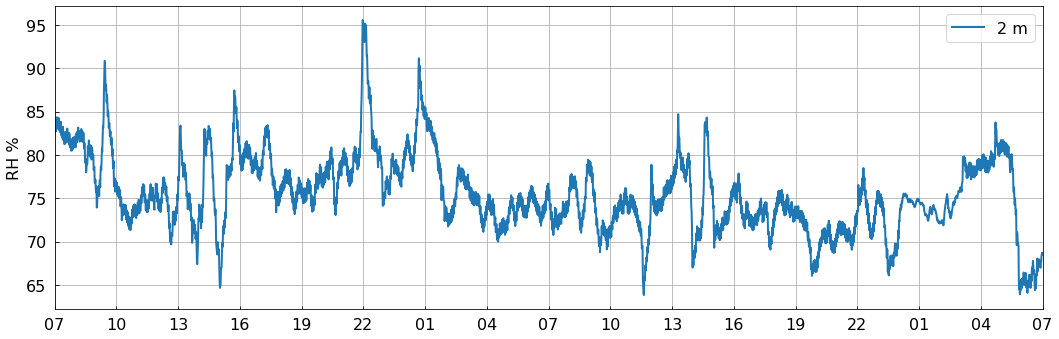

In [25]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.grid(True)
ax.plot(hmp1.index,hmp1['RH'], label='2 m',lw=2)   
#ax.plot(hmp2.index,hmp2['RH'], label='4 m',lw=2)   
#ax.plot(hmp3.index,hmp3['RH'], label='9 m',lw=2)   
#ax.plot(hmp4.index,hmp4['RH'], label='14 m',lw=2)   

ax.set_ylabel('RH %')

ax.xaxis.set_major_formatter(md.DateFormatter('%H'))
#ax.xaxis.set_major_locator(md.DayLocator(bymonthday=1))
ax.xaxis.set_major_locator(md.HourLocator(interval=3))
ax.legend()
ax.set_xlim(d1,d2)
#ax.legend(loc='best',fontsize=10)
fig.tight_layout()
#fig.savefig(d_loc + 'Ncounts_current.png')

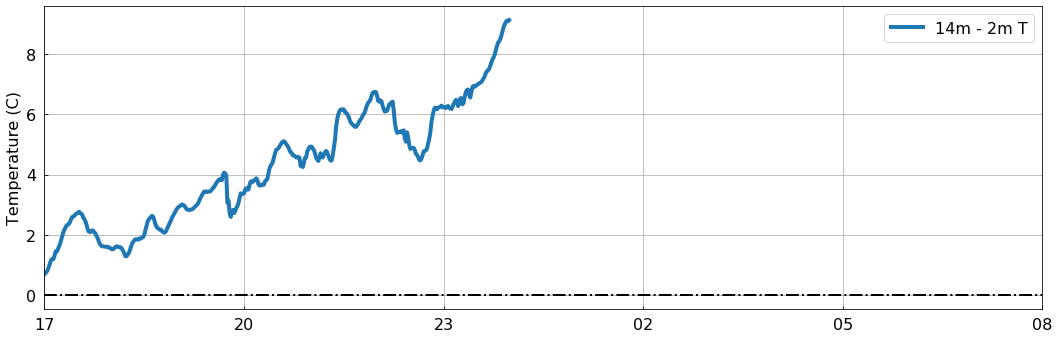

In [17]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.grid(True)
ax.plot(hmp1.index,(hmp4['Ta'] - hmp1['Ta']), lw=4,label='14m - 2m T')    

ax.set_ylabel('Temperature (C)')

ax.xaxis.set_major_formatter(md.DateFormatter('%H'))
#ax.xaxis.set_major_locator(md.DayLocator(bymonthday=1))
ax.xaxis.set_major_locator(md.HourLocator(interval=3))
ax.axhline(0,lw=2,ls='-.',c='k')
ax.legend()
ax.set_xlim(d1,d2)
#ax.legend(loc='best',fontsize=10)
fig.tight_layout()
#fig.savefig(d_loc + 'Ncounts_current.png')

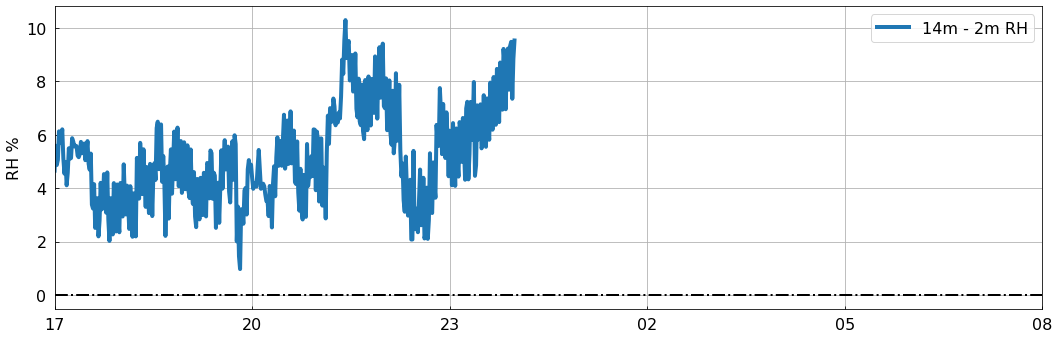

In [18]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.grid(True)
ax.plot(hmp1.index,(hmp4['RH'] - hmp1['RH']), lw=4,label='14m - 2m RH')    

ax.set_ylabel('RH %')

ax.xaxis.set_major_formatter(md.DateFormatter('%H'))
#ax.xaxis.set_major_locator(md.DayLocator(bymonthday=1))
ax.xaxis.set_major_locator(md.HourLocator(interval=3))
ax.axhline(0,lw=2,ls='-.',c='k')
ax.legend()
ax.set_xlim(d1,d2)
#ax.legend(loc='best',fontsize=10)
fig.tight_layout()
#fig.savefig(d_loc + 'Ncounts_current.png')